<a href="https://colab.research.google.com/github/gerega37/mipt_study/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns

In [ ]:
url_1 = 'https://raw.githubusercontent.com/gerega37/mipt_study/main/diabetes.csv'
diabetes = pd.read_csv(url_1)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes = diabetes.rename(columns={'BloodPressure': 'diaBP', 'Outcome': 'Diabetes'})

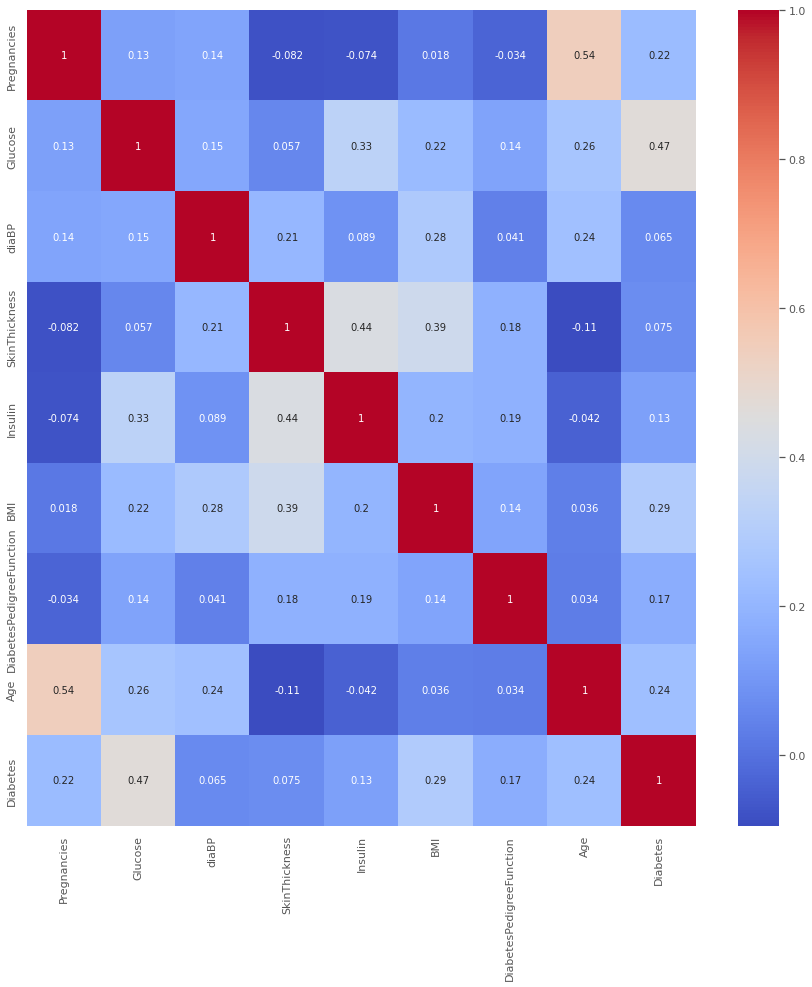

In [ ]:
# get correlation of each feature in our dataset
corr_matrix1 = diabetes.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix1, robust=True, annot=True, cmap='coolwarm');

The columns glucose level, body mass index and age have a maximal correlation with diabetes.

In [ ]:
diabetes['Diabetes'].value_counts()

0    500
1    268
Name: Diabetes, dtype: int64

We can notice that our dataset is not well-balanced because the number of non-diabetic person twice higher, than diabetic.

In [ ]:
diabetes.groupby('Diabetes').agg(['mean','median'])

Pregnancies            Glucose             diaBP         \
                mean median        mean median       mean median   
Diabetes                                                           
0           3.298000    2.0  109.980000  107.0  68.184000   70.0   
1           4.865672    4.0  141.257463  140.0  70.824627   74.0   

         SkinThickness            Insulin               BMI         \
                  mean median        mean median       mean median   
Diabetes                                                             
0            19.664000   21.0   68.792000   39.0  30.304200  30.05   
1            22.164179   27.0  100.335821    0.0  35.142537  34.25   

         DiabetesPedigreeFunction               Age         
                             mean median       mean median  
Diabetes                                                    
0                        0.429734  0.336  31.190000   27.0  
1                        0.550500  0.449  37.067164   36.0

In [ ]:
# Cardiovascular Study Dataset
url_2 = 'https://raw.githubusercontent.com/gerega37/mipt_study/main/train.csv'
cv_train_df = pd.read_csv(url_2)
cv_train_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# the "id" column does not give us data for research
cv_train_df = cv_train_df.drop(columns=['id'])

In [ ]:
cv_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [ ]:
cv_train_df = cv_train_df.rename(columns={'age': 'Age', 'diabetes': 'Diabetes', 'glucose': 'Glucose'})

In [ ]:
cv_train_df.head()

,Age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,Diabetes,totChol,sysBP,diaBP,BMI,heartRate,Glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
url_3 = 'https://raw.githubusercontent.com/gerega37/mipt_study/main/test.csv'
cv_test_df = pd.read_csv(url_3)
cv_test_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [ ]:
# the "id" column does not give us data for research
cv_test_df = cv_test_df.drop(columns=['id'])

In [ ]:
cv_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              848 non-null    int64  
 1   education        830 non-null    float64
 2   sex              848 non-null    object 
 3   is_smoking       848 non-null    object 
 4   cigsPerDay       841 non-null    float64
 5   BPMeds           839 non-null    float64
 6   prevalentStroke  848 non-null    int64  
 7   prevalentHyp     848 non-null    int64  
 8   diabetes         848 non-null    int64  
 9   totChol          836 non-null    float64
 10  sysBP            848 non-null    float64
 11  diaBP            848 non-null    float64
 12  BMI              843 non-null    float64
 13  heartRate        848 non-null    float64
 14  glucose          764 non-null    float64
dtypes: float64(9), int64(4), object(2)
memory usage: 99.5+ KB


In [ ]:
cv_test_df = cv_test_df.rename(columns={'age': 'Age', 'diabetes': 'Diabetes', 'glucose': 'Glucose'})

In [ ]:
cv_test_df.head()

,Age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,Diabetes,totChol,sysBP,diaBP,BMI,heartRate,Glucose
0,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [ ]:
# combining two sets of cardiovascular research data
cv_df = pd.concat([cv_train_df, cv_test_df])

In [ ]:
cv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4238 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              4238 non-null   int64  
 1   education        4133 non-null   float64
 2   sex              4238 non-null   object 
 3   is_smoking       4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   Diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  Glucose          3850 non-null   float64
 15  TenYearCHD       3390 non-null   float64
dtypes: float64(10), int64(4), object(2)
memory usage: 562.9+ KB


In [ ]:
cv_df['prevalentStroke'].value_counts()

0    4213
1      25
Name: prevalentStroke, dtype: int64

Positive answers are about 0.5%, so we can drop this column.

In [ ]:
# categorical variables
var_cat = ['sex', 'is_smoking', 'BPMeds', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'TenYearCHD']

# continuous variables
var_real = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'heartRate', 'Glucose']

target = 'Diabetes'

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


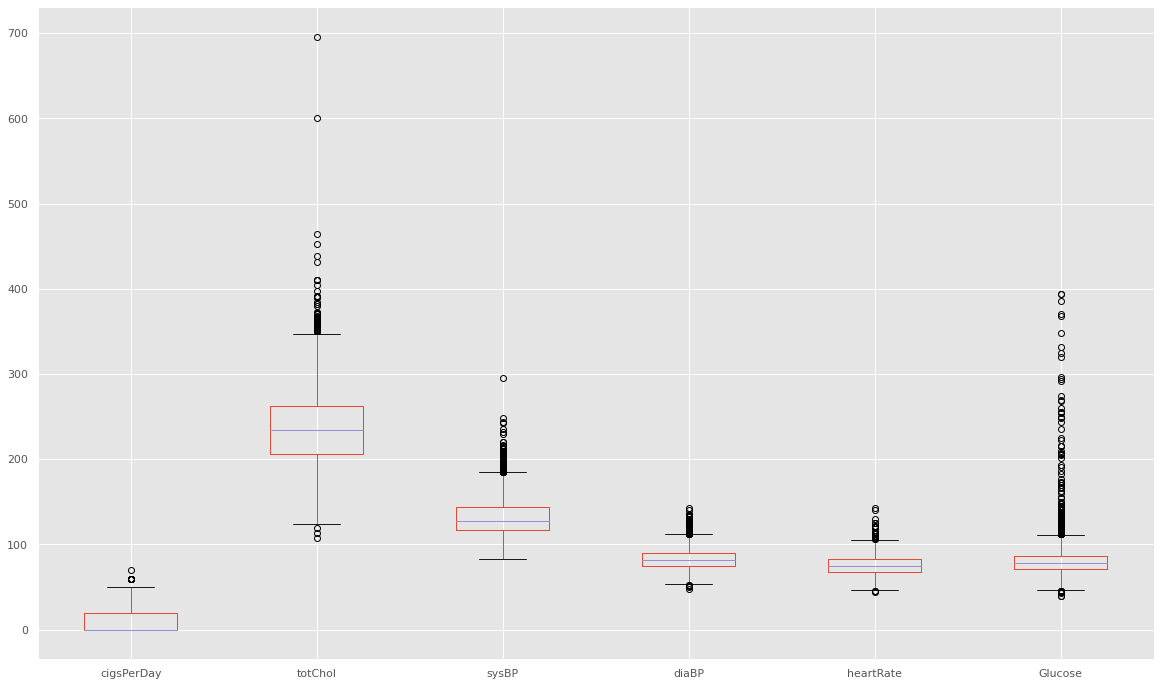

In [ ]:
cv_df[var_real].boxplot(figsize=(20, 12));

We can see quite a lot of emissions in the data reflecting glucose and cholesterol levels.

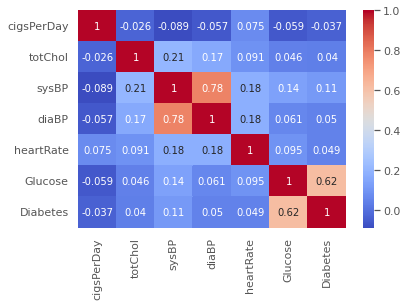

In [ ]:
# get correlation of continuous variables in our dataset
sns.heatmap(cv_df[var_real+[target]].corr(), cmap='coolwarm', annot = True);

We still have a high correlation between diabetes and glucose levels.


In [ ]:
# create combined first with second dataset
diabetes_extended = pd.concat([cv_df, diabetes])

In [ ]:
diabetes_extended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5006 entries, 0 to 767
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       5006 non-null   int64  
 1   education                 4133 non-null   float64
 2   sex                       4238 non-null   object 
 3   is_smoking                4238 non-null   object 
 4   cigsPerDay                4209 non-null   float64
 5   BPMeds                    4185 non-null   float64
 6   prevalentStroke           4238 non-null   float64
 7   prevalentHyp              4238 non-null   float64
 8   Diabetes                  5006 non-null   int64  
 9   totChol                   4188 non-null   float64
 10  sysBP                     4238 non-null   float64
 11  diaBP                     5006 non-null   float64
 12  BMI                       4987 non-null   float64
 13  heartRate                 4237 non-null   float64
 14  Glucose  

In [ ]:
HighBP = (diabetes_extended['sysBP'] >= 140) &(diabetes_extended['diaBP'] >= 90)
HighBP

0      False
1       True
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 5006, dtype: bool

In [ ]:
def make_HighBP(row: pd.DataFrame) -> int:
    """
    Check 'sysBP' and 'diaBP' values.

    param: row is a pd.DataFrame
    return: 1 if True, 0 if False 
    """
    if (row['sysBP'] >= 140) & (row['diaBP'] >= 90):
        return 1
    else:
        return 0

In [ ]:
diabetes_extended['HighBP'] = diabetes_extended.apply(lambda row: make_HighBP(row), axis=1)

In [ ]:
diabetes_extended['HighBP'].value_counts()

0    4175
1     831
Name: HighBP, dtype: int64

In [ ]:
diabetes_extended["sex"] = diabetes_extended["sex"].replace({'F': 0, 'M': 1,})

In [ ]:
diabetes_extended = diabetes_extended.rename(columns={'is_smoking': 'Smoker'})

In [ ]:
diabetes_extended["Smoker"] = diabetes_extended["Smoker"].replace({'NO': 0, 'YES': 1,})

In [ ]:
diabetes_extended.head()

,Age,education,sex,Smoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,Diabetes,totChol,...,diaBP,BMI,heartRate,Glucose,TenYearCHD,Pregnancies,SkinThickness,Insulin,DiabetesPedigreeFunction,HighBP
0,64,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0,221.0,...,85.0,NaN,90.0,80.0,1.0,NaN,NaN,NaN,NaN,0
1,36,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0,212.0,...,98.0,29.77,72.0,75.0,0.0,NaN,NaN,NaN,NaN,1
2,46,1.0,0.0,1.0,10.0,0.0,0.0,0.0,0,250.0,...,71.0,20.35,88.0,94.0,0.0,NaN,NaN,NaN,NaN,0
3,50,1.0,1.0,1.0,20.0,0.0,0.0,1.0,0,233.0,...,88.0,28.26,68.0,94.0,1.0,NaN,NaN,NaN,NaN,0
4,64,1.0,0.0,1.0,30.0,0.0,0.0,0.0,0,241.0,...,85.0,26.42,70.0,77.0,0.0,NaN,NaN,NaN,NaN,0


We have put the most important blood pressure data in the "HighBP" column, so now we can drop the prevalentHyp, sysBP and diaBP columns, TenYearCHD. 
The "Smoker" column gives us enough information about the patient's status, so I think the "cigsPerDay" column is unnecessary.
Our database includes patients of both sexes, so the "Pregnancy" column does not contain important information.
There are a lot of zero values in SkinThickness and Insulin columns, so I think we can also drop them.

In [ ]:
diabetes_extended = diabetes_extended.drop(columns=['sysBP',
                                                    'diaBP',
                                                    'cigsPerDay',
                                                    'Pregnancies',
                                                    'SkinThickness',
                                                    'Insulin',
                                                    'DiabetesPedigreeFunction',
                                                    'prevalentHyp',
                                                    'TenYearCHD',
                                                    'education',
                                                    'prevalentStroke'])

In [ ]:
diabetes_extended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5006 entries, 0 to 767
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        5006 non-null   int64  
 1   sex        4238 non-null   float64
 2   Smoker     4238 non-null   float64
 3   BPMeds     4185 non-null   float64
 4   Diabetes   5006 non-null   int64  
 5   totChol    4188 non-null   float64
 6   BMI        4987 non-null   float64
 7   heartRate  4237 non-null   float64
 8   Glucose    4618 non-null   float64
 9   HighBP     5006 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 430.2 KB


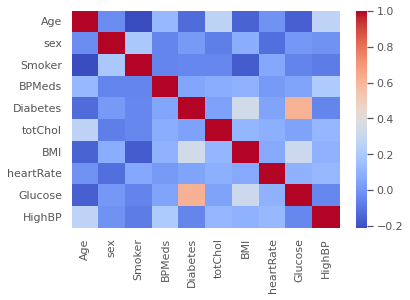

In [ ]:
corr_matrix2 = diabetes_extended.corr()
sns.heatmap(corr_matrix2, robust=False, cmap='coolwarm');

In [ ]:
diabetes_extended['totChol'].value_counts()

240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
353.0     1
367.0     1
398.0     1
453.0     1
371.0     1
Name: totChol, Length: 248, dtype: int64

High cholesterol - values above 240 mg/dl

In [ ]:
highChol = diabetes_extended['totChol'] >= 240
diabetes_extended['HighChol'] = np.where(highChol, 1, 0)

In [ ]:
diabetes_extended = diabetes_extended.drop(columns='totChol')

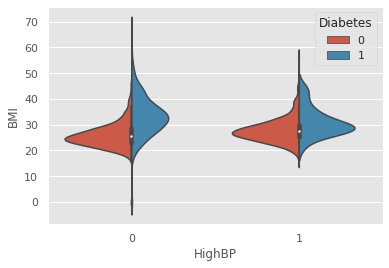

In [ ]:
sns.violinplot(data=diabetes_extended, x="HighBP", y="BMI", hue="Diabetes", split=True);

We can see the effect of BMI on blood pressure, these values are more correlated with diabetes.

In [ ]:
# Diabetes Health Indicators Dataset
url_4 = 'https://raw.githubusercontent.com/gerega37/mipt_study/main/diabetes_012_health_indicators_BRFSS2015.csv'
health_indicators = pd.read_csv(url_4)
health_indicators.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
health_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
health_indicators.groupby('Diabetes_012').agg(['mean','median'])

HighBP         HighChol        CholCheck               BMI  \
                  mean median      mean median      mean median       mean   
Diabetes_012                                                                 
0.0           0.371132    0.0  0.379171    0.0  0.957104    1.0  27.742521   
1.0           0.629022    1.0  0.620816    1.0  0.986612    1.0  30.724466   
2.0           0.752674    1.0  0.670118    1.0  0.993182    1.0  31.944011   

                       Smoker         ...  DiffWalk              Sex         \
             median      mean median  ...      mean median      mean median   
Diabetes_012                          ...                                     
0.0            27.0  0.429680    0.0  ...  0.132282    0.0  0.433985    0.0   
1.0            30.0  0.492766    0.0  ...  0.277478    0.0  0.437702    0.0   
2.0            31.0  0.518220    1.0  ...  0.371216    0.0  0.479121    0.0   

                   Age        Education           Income         
                  mean median      mean median      mean median  
Diabetes_012                                                     
0.0           7.786559    8.0  5.106629    5.0  6.208663    7.0  
1.0           9.083351    9.0  4.784496    5.0  5.351112    6.0  
2.0           9.379053   10.0  4.745516    5.0  5.210094    6.0  

[3 rows x 42 columns]

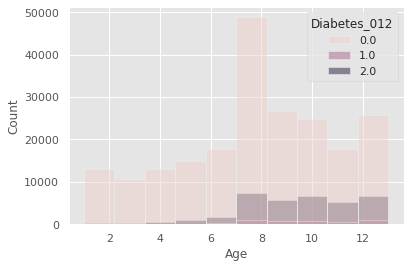

In [ ]:
sns.histplot(data=health_indicators, x="Age", hue="Diabetes_012", bins=10);

It's interesting to note that the data in dataset is about children

In [ ]:
health_indicators['Stroke'].value_counts()

0.0    243388
1.0     10292
Name: Stroke, dtype: int64

I hope it was a joke and patients at this age did not have strokes)

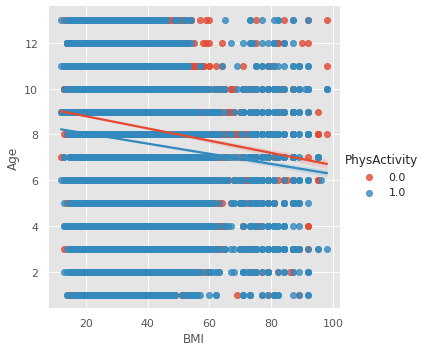

In [ ]:
sns.lmplot(data=health_indicators, x="BMI", y="Age", hue="PhysActivity");

The dependency between BMI and physical activity. The data show a decrease in activity with age.

In [ ]:
health_indicators = health_indicators.rename(columns={'Diabetes_012': 'Diabetes', 'Sex': 'sex'})

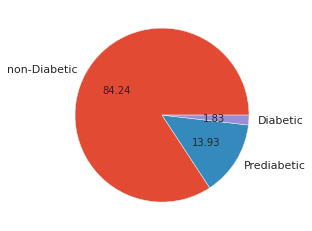

In [ ]:
labels=["non-Diabetic","Prediabetic","Diabetic"]
plt.pie(health_indicators["Diabetes"].value_counts(),
        labels =labels,
        autopct='%.02f'
        );

On this plot, we can observe that approximately 1/6 of the respondents are in a prediabetic state.

In [ ]:
health_indicators.query("`Age` >= 3.0 and `Smoker` == 1.0")['Diabetes'].value_counts(normalize=True)

0.0    0.811763
2.0    0.167533
1.0    0.020704
Name: Diabetes, dtype: float64

Positive answers to the question about smoking are also like a joke.

In [ ]:
duplicates = health_indicators[health_indicators.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  23899


,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,sex,Age,Education,Income
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [ ]:
health_indicators.drop_duplicates(inplace = True)

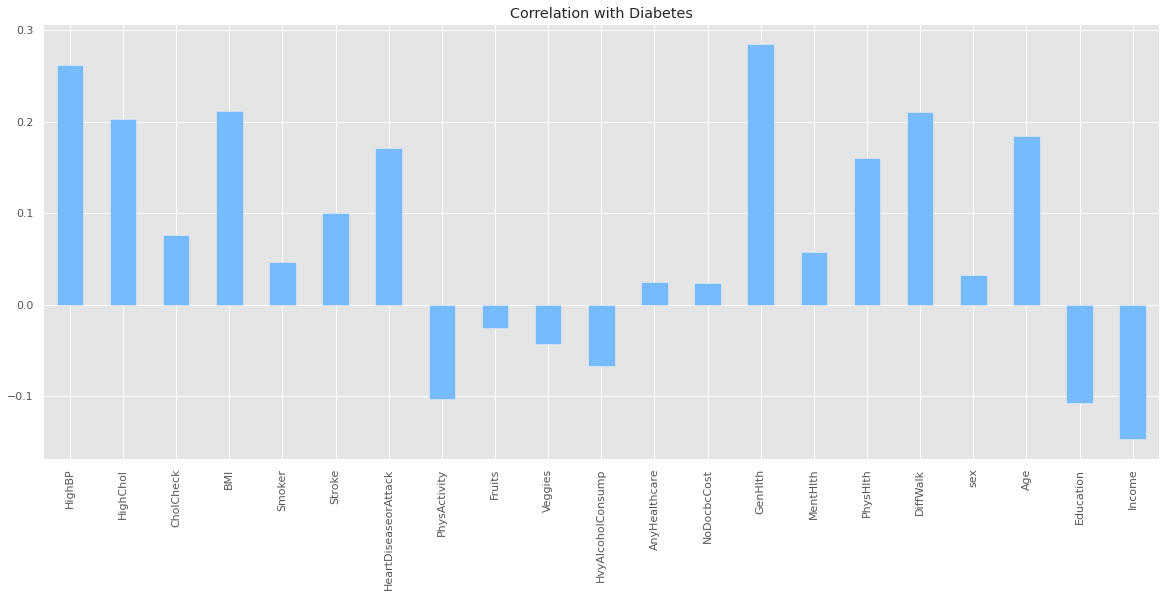

In [ ]:
health_indicators.drop('Diabetes', axis=1).corrwith(health_indicators.Diabetes).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes",color="xkcd:sky blue");

Some conclusions based on this plot:
1. The lowest correlation is observed between the incidence of diabetes and the consumption of fruits and vegetables, AnyHealthcare , NoDocbccost and sex.
2. The highest correlation is observed between the incidence of diabetes and HighBP, HighChol , BMI, GenHlth , and Diffwalk. There is also a fairly high negative correlation between income and diabetes, which, in my opinion, reflects the standard of living and attentive attitude to health.
This confirms our assumptions about the dependence of high blood pressure, high cholesterol, and BMI on diabetes.

In [ ]:
health_indicators = health_indicators.drop(columns=['Stroke',
                                                    'CholCheck',
                                                    'Fruits',
                                                    'Veggies',
                                                    'AnyHealthcare',
                                                    'NoDocbcCost',
                                                    'MentHlth',
                                                    'HvyAlcoholConsump',
                                                    'HeartDiseaseorAttack',
                                                    'Education',
                                                    'Income',
                                                    'PhysHlth'])

Let's drop all the columns that are not suitable for our sample of children and delete the columns whose actual value is duplicated by others.

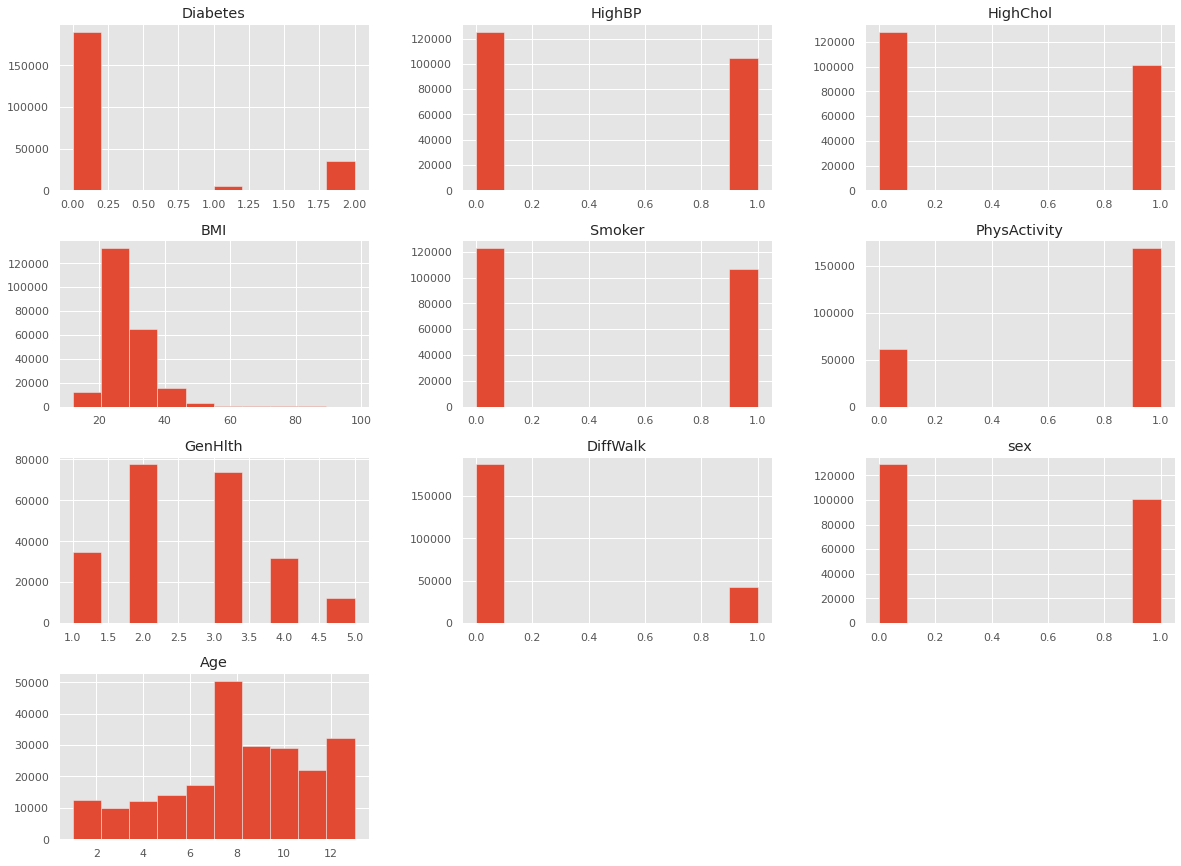

In [ ]:
health_indicators.hist(figsize=(20,15));

In [ ]:
 health_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Diabetes      229781 non-null  float64
 1   HighBP        229781 non-null  float64
 2   HighChol      229781 non-null  float64
 3   BMI           229781 non-null  float64
 4   Smoker        229781 non-null  float64
 5   PhysActivity  229781 non-null  float64
 6   GenHlth       229781 non-null  float64
 7   DiffWalk      229781 non-null  float64
 8   sex           229781 non-null  float64
 9   Age           229781 non-null  float64
dtypes: float64(10)
memory usage: 19.3 MB


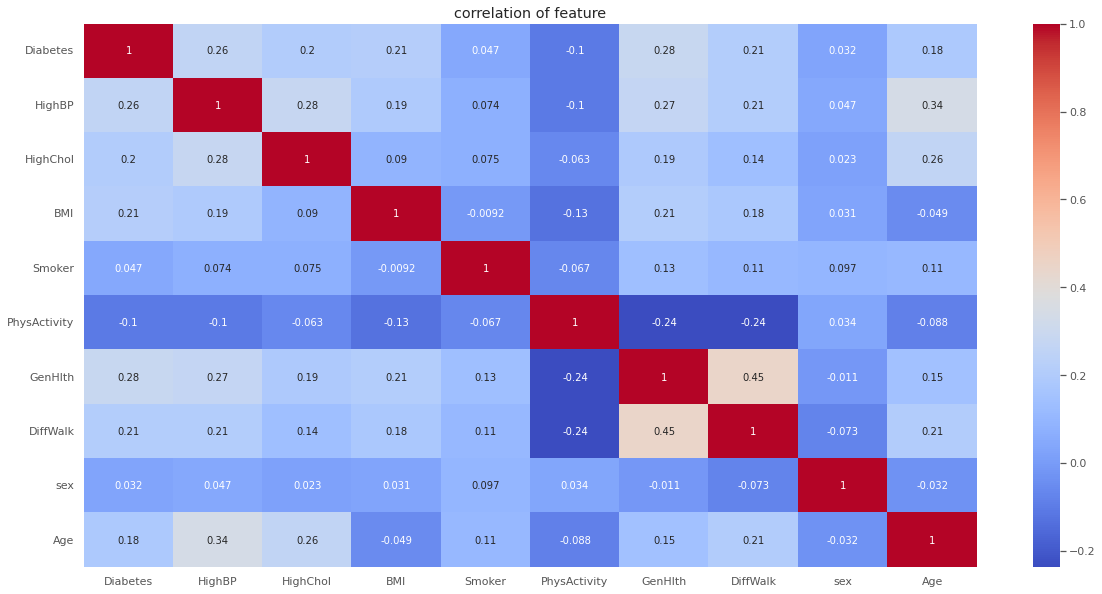

In [ ]:
health_indicators.corr()
plt.figure(figsize = (20,10))
sns.heatmap(health_indicators.corr(),annot=True , cmap ='coolwarm');
plt.title("correlation of feature");

Correlation heatmap shows relation between next columns:

Positive relation between GenHlth and PhysHlth.

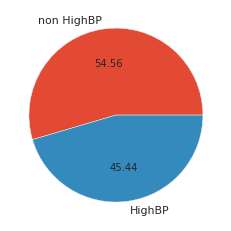

In [ ]:
labels=["non HighBP","HighBP"]
plt.pie(health_indicators["HighBP"].value_counts(),
        labels =labels,
        autopct='%.02f' );

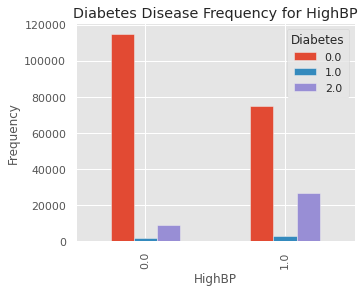

In [ ]:
pd.crosstab(health_indicators.HighBP,health_indicators.Diabetes).plot(kind='bar',figsize=(5,4))

plt.title('Diabetes Disease Frequency for HighBP')
plt.xlabel('HighBP')
plt.ylabel('Frequency')
plt.show()

In [ ]:
(health_indicators.groupby("Diabetes")["HighBP"].value_counts()/health_indicators.groupby("Diabetes")["HighBP"].count())*100

Diabetes  HighBP
0.0       0.0       60.482492
          1.0       39.517508
1.0       1.0       62.907755
          0.0       37.092245
2.0       1.0       75.234351
          0.0       24.765649
Name: HighBP, dtype: float64

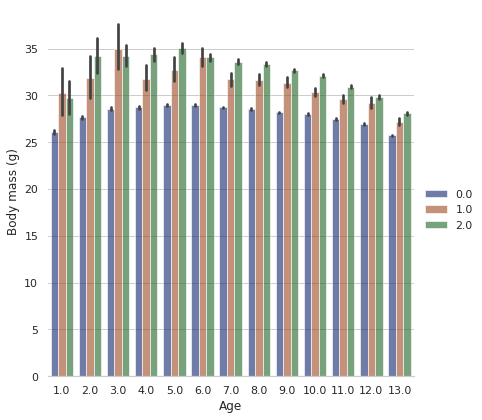

In [ ]:
# Dependence of body mass index on age among diabetics and non-diabetics
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=health_indicators, kind="bar",
    x="Age", y="BMI", hue="Diabetes",
    palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Age", "Body mass (g)")
g.legend.set_title("")

Patients who have diabetes or are in a prediabetic state have a higher body mass index than non-diabetics.

In [ ]:
health_indicators[(health_indicators["BMI"]<=20)]["Diabetes"].value_counts()

0.0    11546
2.0      545
1.0      113
Name: Diabetes, dtype: int64

In [ ]:
health_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Diabetes      229781 non-null  float64
 1   HighBP        229781 non-null  float64
 2   HighChol      229781 non-null  float64
 3   BMI           229781 non-null  float64
 4   Smoker        229781 non-null  float64
 5   PhysActivity  229781 non-null  float64
 6   GenHlth       229781 non-null  float64
 7   DiffWalk      229781 non-null  float64
 8   sex           229781 non-null  float64
 9   Age           229781 non-null  float64
dtypes: float64(10)
memory usage: 27.3 MB


In [ ]:
diabetes_extended['Diabetes'] = diabetes_extended['Diabetes'].replace({1 : 2})

In [ ]:
diabetes_final = pd.concat([health_indicators, diabetes_extended])

In [ ]:
diabetes_final.head()

,Diabetes,HighBP,HighChol,BMI,Smoker,PhysActivity,GenHlth,DiffWalk,sex,Age,BPMeds,heartRate,Glucose
0,0.0,1.0,1.0,40.0,1.0,0.0,5.0,1.0,0.0,9.0,NaN,NaN,NaN
1,0.0,0.0,0.0,25.0,1.0,1.0,3.0,0.0,0.0,7.0,NaN,NaN,NaN
2,0.0,1.0,1.0,28.0,0.0,0.0,5.0,1.0,0.0,9.0,NaN,NaN,NaN
3,0.0,1.0,0.0,27.0,0.0,1.0,2.0,0.0,0.0,11.0,NaN,NaN,NaN
4,0.0,1.0,1.0,24.0,0.0,1.0,2.0,0.0,0.0,11.0,NaN,NaN,NaN


In [ ]:
diabetes_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234787 entries, 0 to 767
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Diabetes      234787 non-null  float64
 1   HighBP        234787 non-null  float64
 2   HighChol      234787 non-null  float64
 3   BMI           234768 non-null  float64
 4   Smoker        234019 non-null  float64
 5   PhysActivity  229781 non-null  float64
 6   GenHlth       229781 non-null  float64
 7   DiffWalk      229781 non-null  float64
 8   sex           234019 non-null  float64
 9   Age           234787 non-null  float64
 10  BPMeds        4185 non-null    float64
 11  heartRate     4237 non-null    float64
 12  Glucose       4618 non-null    float64
dtypes: float64(13)
memory usage: 25.1 MB


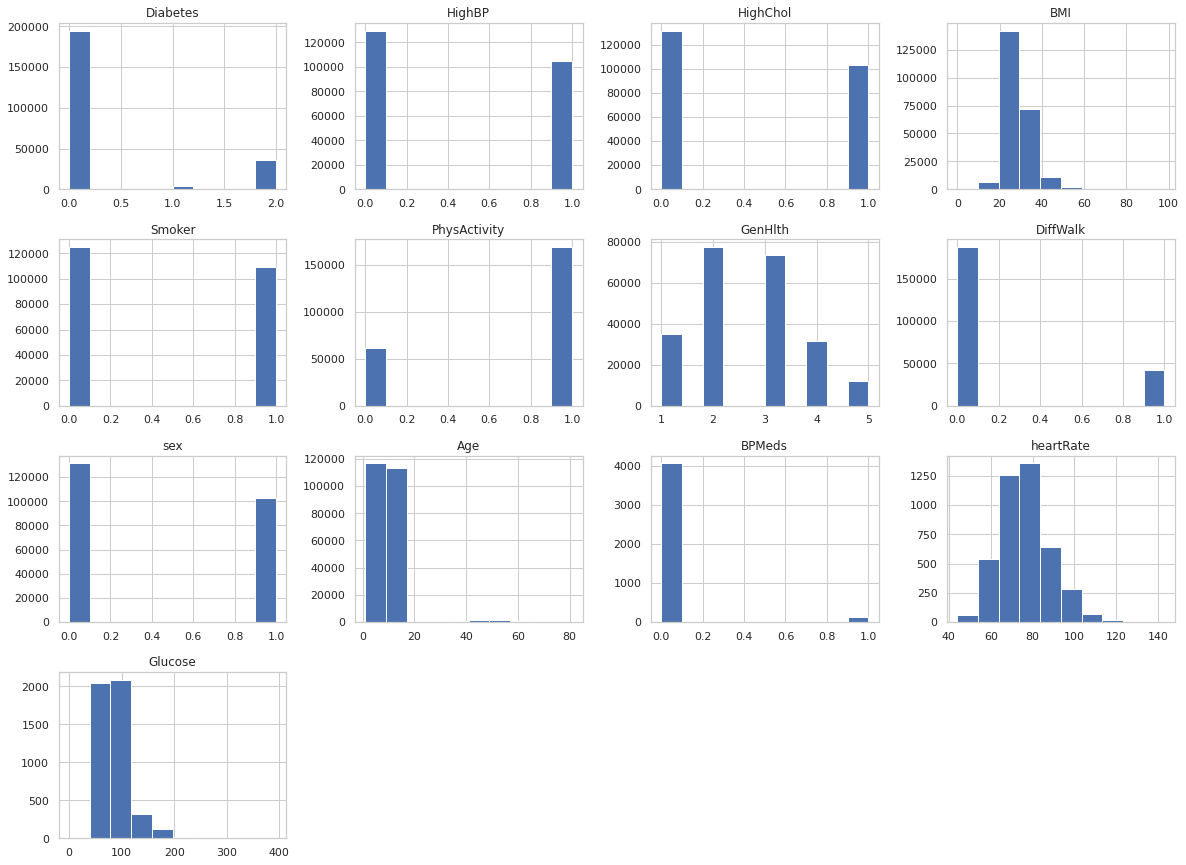

In [ ]:
diabetes_final.hist(figsize=(20,15));

In [ ]:
# categorical variables
var_cat1 = ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'GenHlth', 'DiffWalk', 'sex', 'BPMeds']

# continuous variables
var_real1 = ['BMI', 'Glucose', 'heartRate', 'Age']

target1 = 'Diabetes'

In [ ]:
diabetes_final[var_real1] = diabetes_final[var_real1].apply(lambda x: x.astype('float16'))

In [ ]:
diabetes_final[var_cat1+[target1]] = diabetes_final[var_cat1+[target1]].apply(lambda x: x.astype('category'))

In [ ]:
diabetes_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234787 entries, 0 to 767
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Diabetes      234787 non-null  category
 1   HighBP        234787 non-null  category
 2   HighChol      234787 non-null  category
 3   BMI           234768 non-null  float16 
 4   Smoker        234019 non-null  category
 5   PhysActivity  229781 non-null  category
 6   GenHlth       229781 non-null  category
 7   DiffWalk      229781 non-null  category
 8   sex           234019 non-null  category
 9   Age           234787 non-null  float16 
 10  BPMeds        4185 non-null    category
 11  heartRate     4237 non-null    float16 
 12  Glucose       4618 non-null    float16 
dtypes: category(9), float16(4)
memory usage: 5.6 MB


By changing the format of the values, we have achieved a reduction in the occupied memory.

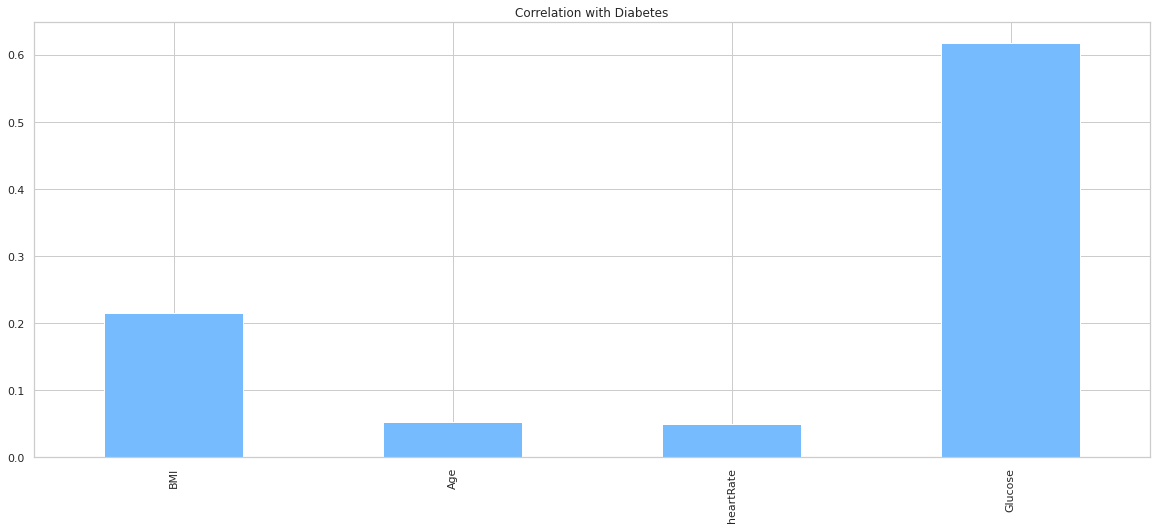

In [ ]:
diabetes_final.drop('Diabetes', axis=1).corrwith(diabetes_final.Diabetes).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes",color="xkcd:sky blue");

Predictors of diabetes may be an increase in BMI and high blood pressure. With age, type 2 diabetes usually develops in the elderly. It is always worth maintaining physical activity not only to avoid diabetes.
High glucose levels are always strongly correlated with diabetes. This is the first thing that should alert a person who does not know about his diabetes yet. In diabetes, blood glucose is chronically elevated. This is due to a malfunction of insulin produced by the pancreas. In diabetes, the pancreas does not produce enough insulin, or the body's cells lose the ability to perceive insulin. Insulin is involved in glucose metabolism and lowers blood sugar levels.